<a href="https://colab.research.google.com/github/animeshc137/Time-Series/blob/main/Time_Series_EDA_%24TSLA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Time Series EDA





In [2]:
# had to update pandas and pandas-datareader to retrieve data
!pip install --upgrade pandas
!pip install --upgrade pandas-datareader

     |████████████████████████████████| 109 kB 5.2 MB/s 
  Attempting uninstall: pandas-datareader
    Found existing installation: pandas-datareader 0.9.0
    Uninstalling pandas-datareader-0.9.0:
      Successfully uninstalled pandas-datareader-0.9.0


In [3]:
from datetime import datetime
import pandas as pd
import pandas_datareader as pdr
import matplotlib.pyplot as plt
%matplotlib inline

Getting and Reading live data from api using PDR (Pandas Data Reader) 

In [4]:
df_tesla = pdr.get_data_yahoo('TSLA')

In [5]:
df_tesla.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-02-27,49.672001,48.402000,49.633999,49.245998,57304000.0,49.245998
2017-02-28,50.200001,48.779999,48.838001,49.998001,30390500.0,49.998001
2017-03-01,50.970001,49.821999,50.835999,50.004002,24047500.0,50.004002
2017-03-02,50.655998,49.653999,49.942001,50.096001,16759000.0,50.096001
2017-03-03,50.380001,49.799999,50.147999,50.313999,14597000.0,50.313999


In [6]:
df_tesla.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2022-02-18,886.869995,837.609985,886.000000,856.979980,22710500.0,856.979980
2022-02-22,856.729980,801.099976,834.130005,821.530029,27762700.0,821.530029
2022-02-23,835.299988,760.559998,830.429993,764.039978,31752300.0,764.039978
2022-02-24,802.479980,700.000000,700.390015,800.770020,44876700.0,800.770020
2022-02-25,819.460815,782.400513,809.229980,810.290222,13438079.0,810.290222


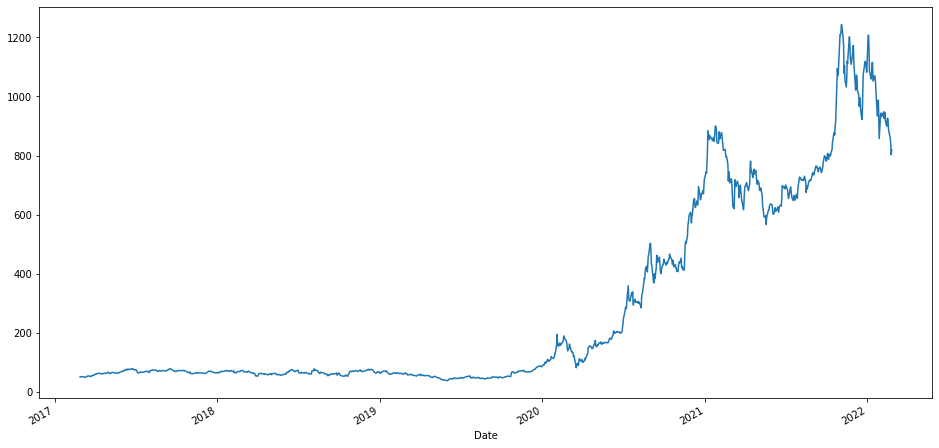

In [7]:
df_tesla['High'].plot(figsize= (16,8))

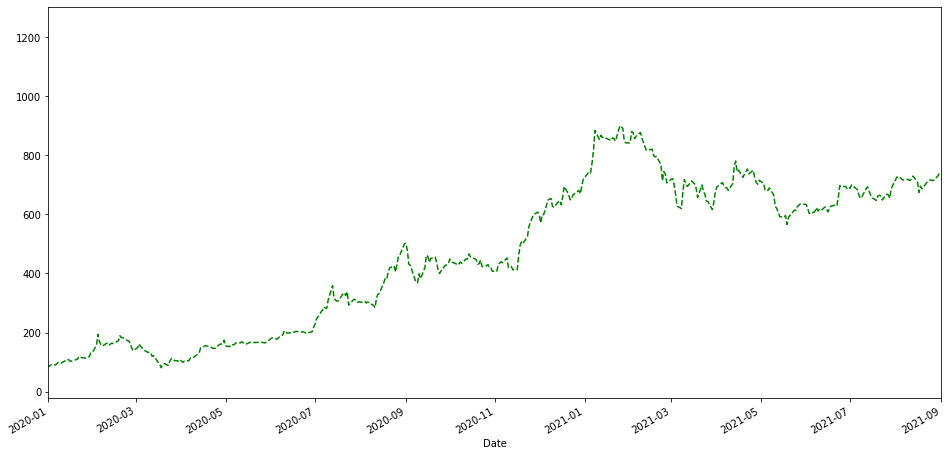

In [8]:
df_tesla['High'].plot(figsize= (16,8),xlim=['2020-01-01','2021-09-01'], c='green',ls= '--')

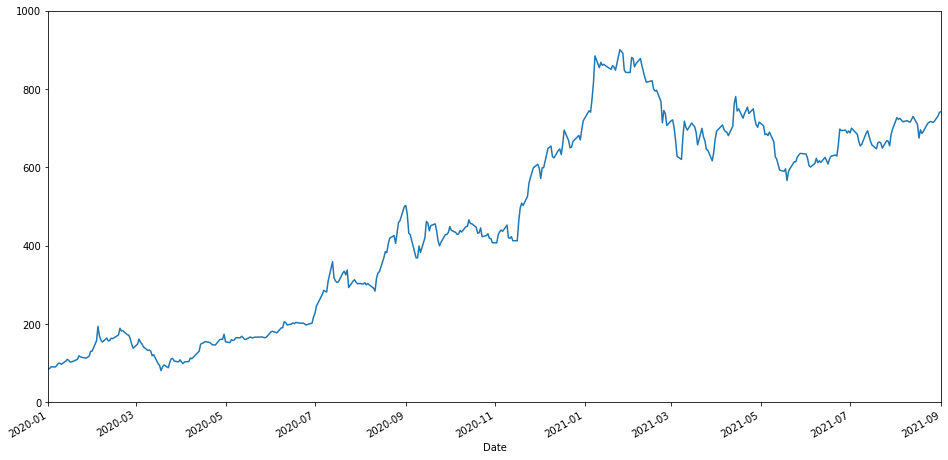

In [9]:
df_tesla['High'].plot(figsize= (16,8),xlim=['2020-01-01','2021-09-01'],ylim=[0,1000]) # x values are in datetime and y values are in int

In [10]:
index = df_tesla.loc['2020-01-01':'2021-09-11'].index
tesla_open = df_tesla.loc['2020-01-01':'2021-09-11']['Open']

In [11]:
index

DatetimeIndex(['2020-01-02', '2020-01-03', '2020-01-06', '2020-01-07',
               '2020-01-08', '2020-01-09', '2020-01-10', '2020-01-13',
               '2020-01-14', '2020-01-15',
               ...
               '2021-08-27', '2021-08-30', '2021-08-31', '2021-09-01',
               '2021-09-02', '2021-09-03', '2021-09-07', '2021-09-08',
               '2021-09-09', '2021-09-10'],
              dtype='datetime64[ns]', name='Date', length=427, freq=None)

In [12]:
tesla_open

Date
2020-01-02     84.900002
2020-01-03     88.099998
2020-01-06     88.094002
2020-01-07     92.279999
2020-01-08     94.739998
                 ...    
2021-09-03    732.250000
2021-09-07    740.000000
2021-09-08    761.580017
2021-09-09    753.409973
2021-09-10    759.599976
Name: Open, Length: 427, dtype: float64

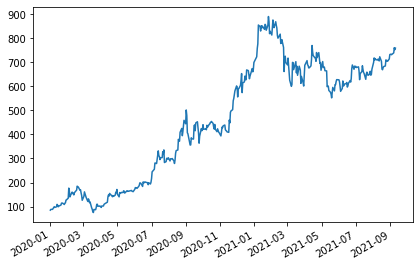

In [14]:
figure,axis = plt.subplots()
# following 2 functions are used to fprevent date overlapping when figure is small
#plt.tight_layout() (didn't help much)
figure.autofmt_xdate()
axis.plot(index,tesla_open)

In [16]:
df_tesla.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1260 entries, 2017-02-27 to 2022-02-25
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1260 non-null   float64
 1   Low        1260 non-null   float64
 2   Open       1260 non-null   float64
 3   Close      1260 non-null   float64
 4   Volume     1260 non-null   float64
 5   Adj Close  1260 non-null   float64
dtypes: float64(6)
memory usage: 101.2 KB


In [20]:
df_tesla = df_tesla.reset_index() # if you want to reset index from date to number

In [21]:
pd.to_datetime(df_tesla['Date']) # now Date is a column

0      2017-02-27
1      2017-02-28
2      2017-03-01
3      2017-03-02
4      2017-03-03
          ...    
1255   2022-02-18
1256   2022-02-22
1257   2022-02-23
1258   2022-02-24
1259   2022-02-25
Name: Date, Length: 1260, dtype: datetime64[ns]

In [22]:
df_tesla

,Date,High,Low,Open,Close,Volume,Adj Close
0,2017-02-27,49.672001,48.402000,49.633999,49.245998,57304000.0,49.245998
1,2017-02-28,50.200001,48.779999,48.838001,49.998001,30390500.0,49.998001
2,2017-03-01,50.970001,49.821999,50.835999,50.004002,24047500.0,50.004002
3,2017-03-02,50.655998,49.653999,49.942001,50.096001,16759000.0,50.096001
4,2017-03-03,50.380001,49.799999,50.147999,50.313999,14597000.0,50.313999
...,...,...,...,...,...,...,...
1255,2022-02-18,886.869995,837.609985,886.000000,856.979980,22710500.0,856.979980
1256,2022-02-22,856.729980,801.099976,834.130005,821.530029,27762700.0,821.530029
1257,2022-02-23,835.299988,760.559998,830.429993,764.039978,31752300.0,764.039978
1258,2022-02-24,802.479980,700.000000,700.390015,800.770020,44876700.0,800.770020


In [27]:
df_tesla = df_tesla.set_index('Date',drop= True) # to set date as index when date is given as a column

In [28]:
df_tesla

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-02-27,49.672001,48.402000,49.633999,49.245998,57304000.0,49.245998
2017-02-28,50.200001,48.779999,48.838001,49.998001,30390500.0,49.998001
2017-03-01,50.970001,49.821999,50.835999,50.004002,24047500.0,50.004002
2017-03-02,50.655998,49.653999,49.942001,50.096001,16759000.0,50.096001
2017-03-03,50.380001,49.799999,50.147999,50.313999,14597000.0,50.313999
...,...,...,...,...,...,...
2022-02-18,886.869995,837.609985,886.000000,856.979980,22710500.0,856.979980
2022-02-22,856.729980,801.099976,834.130005,821.530029,27762700.0,821.530029
2022-02-23,835.299988,760.559998,830.429993,764.039978,31752300.0,764.039978


In [33]:
# datetime
datetime(2021,2,12) #gives an object of datetime with specified datetime values

datetime.datetime(2021, 2, 12, 0, 0)

In [35]:
datetime.now() # gives current time

datetime.datetime(2022, 2, 25, 16, 46, 43, 707422)

In [36]:
date = datetime.now()
date

datetime.datetime(2022, 2, 25, 16, 49, 17, 340052)

In [38]:
date.day,date.month,date.year

(25, 2, 2022)

In [39]:
date.date()

datetime.date(2022, 2, 25)

In [40]:
date.weekday()

4

Weekday returns int corresponding to the daw of the week


0-Monday

1-Tuesday

2-Wednesday

3-Thursday

4-Friday

5-Saturday

6-Sunday

# Time resampling

In [42]:
# A means year end frequency
df_tesla.resample(rule='A').min()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-12-31,49.299999,48.402000,48.838001,48.737999,14597000.0,48.737999
2018-12-31,52.066002,48.917999,50.556000,50.112000,15403500.0,50.112000
2019-12-31,37.335999,35.397999,36.220001,35.793999,12328000.0,35.793999
2020-12-31,80.972000,70.101997,74.940002,72.244003,17357700.0,72.244003
2021-12-31,566.210022,539.489990,552.549988,563.000000,9800600.0,563.000000
2022-12-31,802.479980,700.000000,700.390015,764.039978,13438079.0,764.039978


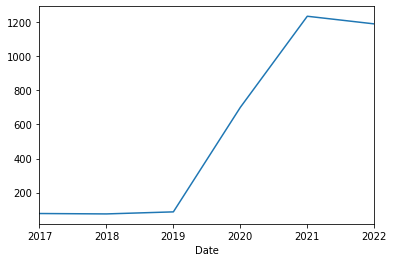

In [45]:
df_tesla.resample(rule='A').max()['Open'].plot()

In [46]:
# means Quarterly Start Frequency
df_tesla.resample(rule='QS').min()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-01,49.299999,48.402000,48.838001,48.737999,14597000.0,48.737999
2017-04-01,59.799999,56.916000,57.380001,59.000000,15178500.0,59.000000
2017-07-01,63.400002,60.625999,62.580002,61.765999,15247500.0,61.765999
2017-10-01,60.891998,58.526001,59.900002,59.852001,16220500.0,59.852001
2018-01-01,53.736000,49.641998,51.298000,51.556000,16098000.0,51.556000
2018-04-01,52.066002,48.917999,50.556000,50.495998,19375500.0,50.495998
2018-07-01,53.669998,50.450001,52.020000,52.647999,18013000.0,52.647999
2018-10-01,52.372002,49.554001,51.049999,50.112000,15403500.0,50.112000
2019-01-01,52.636002,50.891998,51.942001,52.084000,18383500.0,52.084000


In [47]:
df_tesla.resample(rule='QS').max()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-01,56.400002,55.442001,55.745998,55.660000,57304000.0,55.660000
2017-04-01,77.398003,75.870003,77.337997,76.690002,86307000.0,76.690002
2017-07-01,77.921997,75.536003,76.050003,77.000000,96622500.0,77.000000
2017-10-01,72.599998,70.825996,71.396004,71.930000,98957000.0,71.930000
2018-01-01,72.099998,70.472000,72.000000,71.484001,105007000.0,71.484001
2018-04-01,74.746002,70.900002,73.031998,74.166000,111737000.0,74.166000
2018-07-01,77.491997,73.424004,73.818001,75.914001,168248500.0,75.914001
2018-10-01,75.898003,73.349998,75.000000,75.358002,137127500.0,75.358002
2019-01-01,70.400002,68.830002,69.241997,69.461998,120754000.0,69.461998


In [48]:
df_tesla.resample(rule='B').min()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-02-27,49.672001,48.402000,49.633999,49.245998,57304000.0,49.245998
2017-02-28,50.200001,48.779999,48.838001,49.998001,30390500.0,49.998001
2017-03-01,50.970001,49.821999,50.835999,50.004002,24047500.0,50.004002
2017-03-02,50.655998,49.653999,49.942001,50.096001,16759000.0,50.096001
2017-03-03,50.380001,49.799999,50.147999,50.313999,14597000.0,50.313999
...,...,...,...,...,...,...
2022-02-21,NaN,NaN,NaN,NaN,NaN,NaN
2022-02-22,856.729980,801.099976,834.130005,821.530029,27762700.0,821.530029
2022-02-23,835.299988,760.559998,830.429993,764.039978,31752300.0,764.039978


In [50]:
df_tesla.resample(rule='BQS').min()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2017-01-02,49.299999,48.402000,48.838001,48.737999,14597000.0,48.737999
2017-04-03,59.799999,56.916000,57.380001,59.000000,15178500.0,59.000000
2017-07-03,63.400002,60.625999,62.580002,61.765999,15247500.0,61.765999
2017-10-02,60.891998,58.526001,59.900002,59.852001,16220500.0,59.852001
2018-01-01,53.736000,49.641998,51.298000,51.556000,16098000.0,51.556000
2018-04-02,52.066002,48.917999,50.556000,50.495998,19375500.0,50.495998
2018-07-02,53.669998,50.450001,52.020000,52.647999,18013000.0,52.647999
2018-10-01,52.372002,49.554001,51.049999,50.112000,15403500.0,50.112000
2019-01-01,52.636002,50.891998,51.942001,52.084000,18383500.0,52.084000


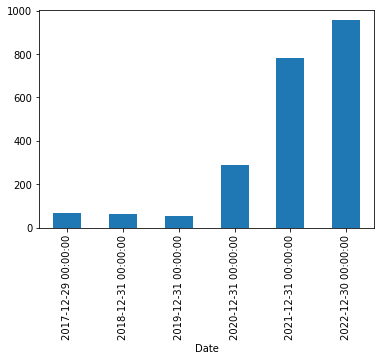

In [51]:
df_tesla['Open'].resample(rule='BA').mean().plot(kind= 'bar')

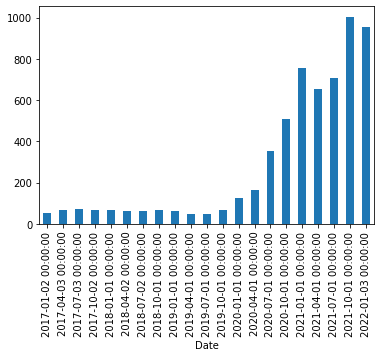

In [54]:
df_tesla['Open'].resample(rule='BQS').mean().plot(kind= 'bar')

In [57]:
# rolling mean (parameter represent the amout of rows rolled)
df_tesla['Open'].rolling(10).mean().head(20)

Date
2017-02-27          NaN
2017-02-28          NaN
2017-03-01          NaN
2017-03-02          NaN
2017-03-03          NaN
2017-03-06          NaN
2017-03-07          NaN
2017-03-08          NaN
2017-03-09          NaN
2017-03-10    49.753200
2017-03-13    49.686200
2017-03-14    49.724600
2017-03-15    49.781001
2017-03-16    50.034800
2017-03-17    50.300000
2017-03-20    50.553800
2017-03-21    50.772001
2017-03-22    50.863200
2017-03-23    51.018400
2017-03-24    51.208200
Name: Open, dtype: float64

In [59]:
df_tesla['Open: 30 Days Rolling'] = df_tesla['Open'].rolling(30).mean()

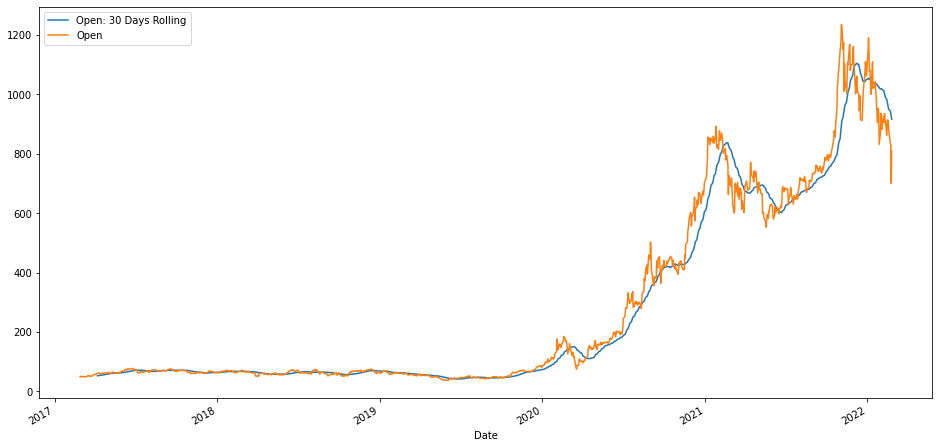

In [61]:
df_tesla[['Open: 30 Days Rolling','Open']].plot(figsize= (16,8)) # rolling smooths u the line in line chart

# Assignmnet 
1. Read the microsoft stock data
2. Get the Maximum price of the Stock from 2017-2022
3. Date of the Highest price of Stock
4. Date of the Lowest price of Stock

p.s. Also read news of the corresponding date related to microsoft

To Study:
1. Upward Trend
2. Downward Trend
3. Stationary Data
4. Cyclic Data